## **UTS JARINGAN SYARAF TIRUAN**

Nama: Biliarto Sastro Cemerson

NIM : 21309149001

### Klasifikasi Kualitas Buah Pisang dengan Metode Backpropagtion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

#### **DATA**

In [ ]:
file_path = '/content/drive/My Drive/JST/banana_quality.csv'
data = pd.read_csv(file_path)
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [ ]:
data.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


### **PRAPROSES DATA**

In [ ]:
data['Quality'].unique()

array(['Good', 'Bad'], dtype=object)

In [ ]:
# Ubah nilai 'Good' menjadi 1 dan 'Bad' menjadi 0
data['Quality'] = data['Quality'].map({'Good': 1, 'Bad': 0})

### **DATA HILANG**

In [ ]:
data.isna().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

### **EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

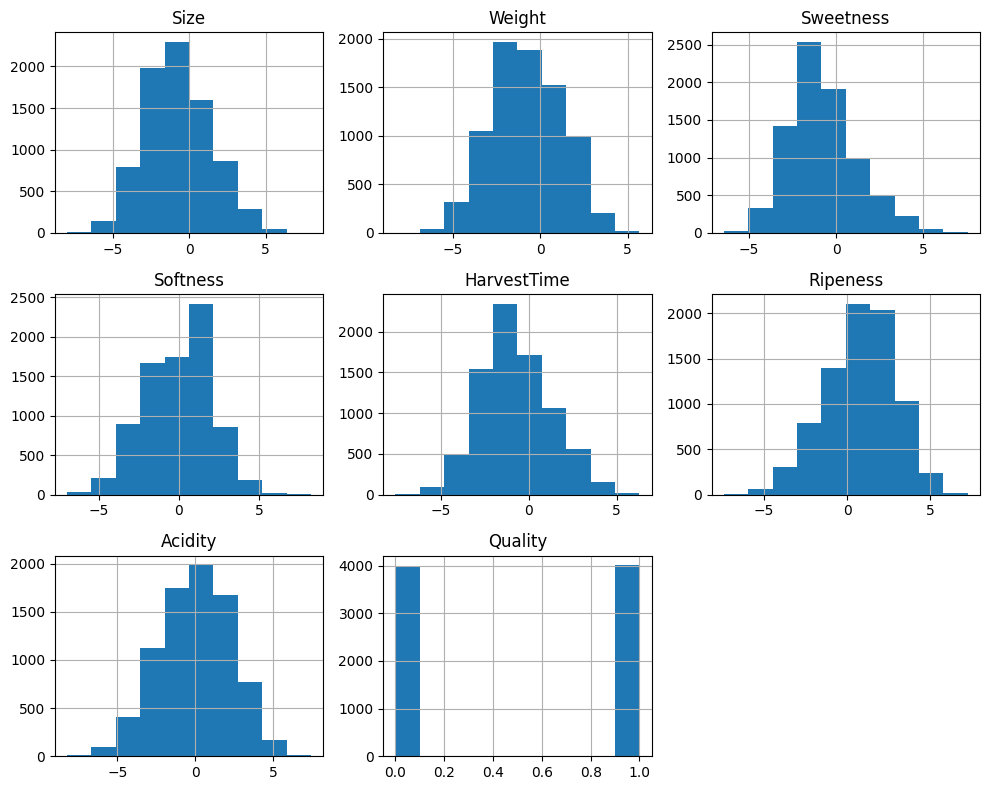

In [ ]:
# Buat histogram untuk setiap variabel numerik
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

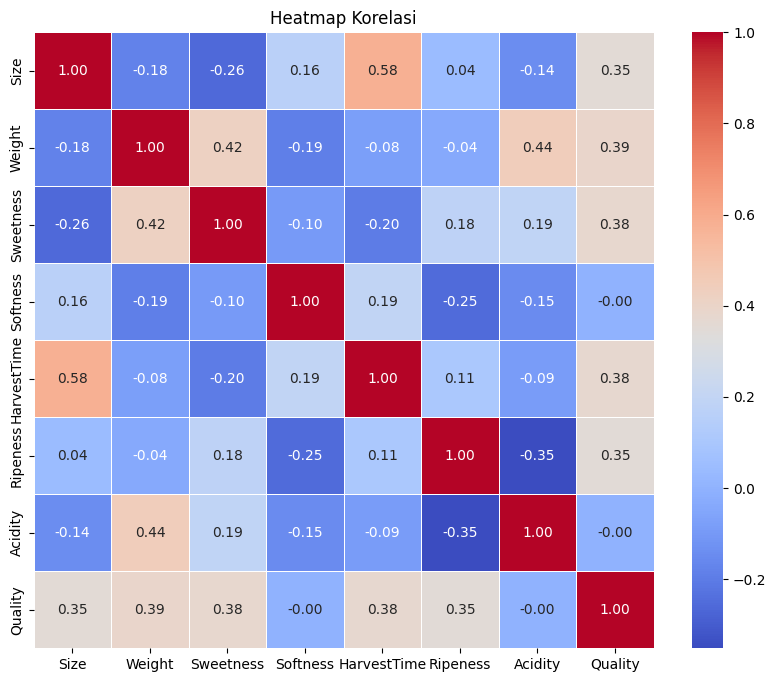

In [ ]:
# Hitung matriks korelasi
correlation_matrix = data.corr()

# Buat heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

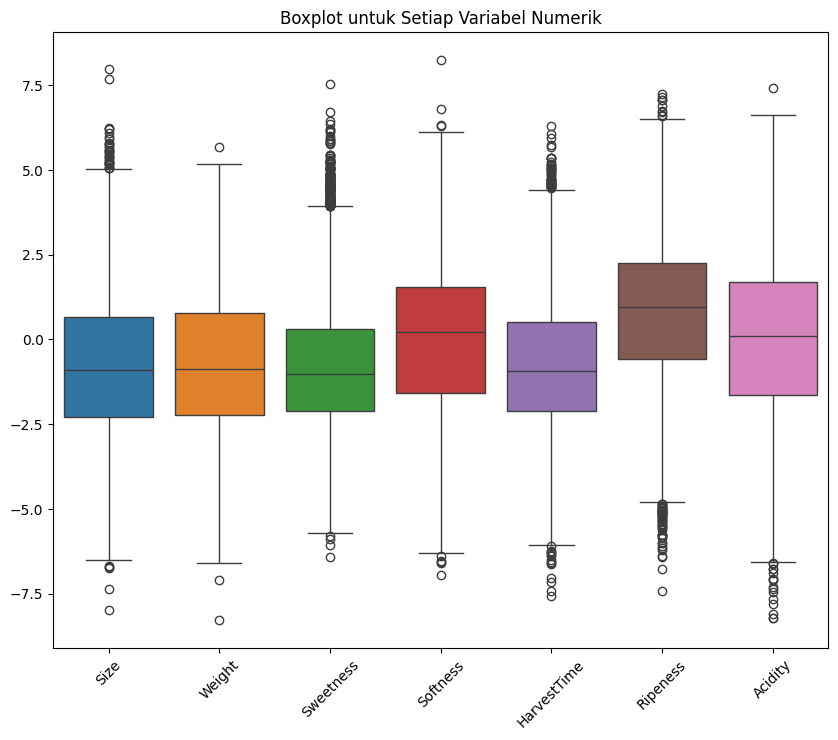

In [ ]:
# Buat boxplot untuk setiap variabel numerik
data_subset = data.drop(columns=['Quality'])

plt.figure(figsize=(10, 8))
sns.boxplot(data=data_subset)
plt.title('Boxplot untuk Setiap Variabel Numerik')
plt.xticks(rotation=45)
plt.show()

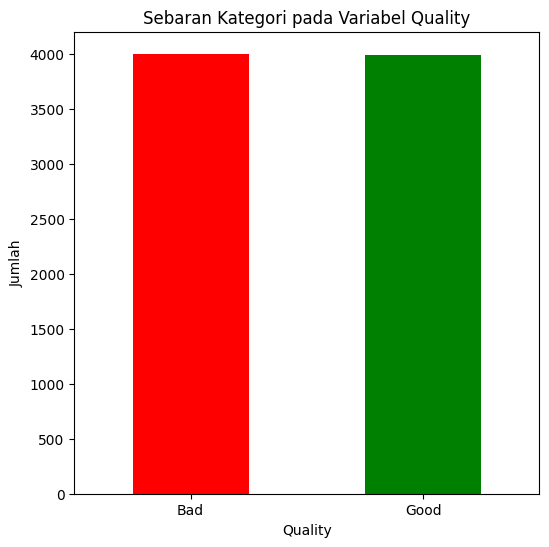

In [ ]:
# Hitung jumlah data untuk setiap kategori 'Quality'
quality_counts = data['Quality'].value_counts()

# Plot bar plot
plt.figure(figsize=(6, 6))
quality_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Sebaran Kategori pada Variabel Quality')
plt.xlabel('Quality')
plt.ylabel('Jumlah')

# Customizing the tick labels
plt.xticks([1, 0], ['Good', 'Bad'], rotation=0)

plt.show()

### **SPLIT DATA**

In [ ]:
X = data.drop(columns=['Quality']).values
y = data['Quality'].values.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Pertama, kita bagi data menjadi data train dan data sisa (80% train + 20% sisanya)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Kemudian, kita bagi data sisa menjadi data validasi dan data pengujian (60% sisa + 20% sisanya)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 25% dari 80% adalah 20%

### **MODELLING**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(5, input_shape=(X_train.shape[1],), activation='sigmoid'),
    Dense(5, activation='sigmoid'),  # Hidden layer pertama dengan 5 neuron
    Dense(5, activation='sigmoid'),  # Hidden layer kedua dengan 5 neuron
    Dense(1, activation='sigmoid')   # Output layer dengan 1 neuron
])

In [ ]:
# Menampilkan ringkasan arsitektur model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 40        
                                                                 
 dense_16 (Dense)            (None, 5)                 30        
                                                                 
 dense_17 (Dense)            (None, 5)                 30        
                                                                 
 dense_18 (Dense)            (None, 1)                 6         
                                                                 
Total params: 106 (424.00 Byte)
Trainable params: 106 (424.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/500
150/150 [==============================] - 1s 3ms/step - loss: 0.6988 - accuracy: 0.4915 - val_loss: 0.6977 - val_accuracy: 0.4481
Epoch 2/500
150/150 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.3742 - val_loss: 0.6972 - val_accuracy: 0.3031
Epoch 3/500
150/150 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.3304 - val_loss: 0.6970 - val_accuracy: 0.4131
Epoch 4/500
150/150 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4429 - val_loss: 0.6968 - val_accuracy: 0.3800
Epoch 5/500
150/150 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.3665 - val_loss: 0.6966 - val_accuracy: 0.4331
Epoch 6/500
150/150 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4079 - val_loss: 0.6963 - val_accuracy: 0.4456
Epoch 7/500
150/150 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.3837 - val_loss: 0.6962 - val_accuracy: 0.4837

In [ ]:
# Evaluasi model pada data validasi
loss_val, accuracy_val = model.evaluate(X_val, y_val, verbose=0)
print("\nLoss pada data validasi:", loss_val)
print("Akurasi pada data validasi:", accuracy_val)


Loss pada data validasi: 0.1106395274400711
Akurasi pada data validasi: 0.9662500023841858


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Membuat prediksi probabilitas pada data validasi
y_pred_prob = model.predict(X_val)

# Mengambil kelas dengan probabilitas tertinggi
y_pred = (y_pred_prob > 0.5).astype(int)

# Membuat classification report
print(classification_report(y_val, y_pred))

50/50 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       800
           1       0.97      0.96      0.97       800

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



In [ ]:
# Evaluasi model pada data validasi
loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=0)
print("\nLoss pada data Test:", loss_test)
print("Akurasi pada data Test:", accuracy_test)


Loss pada data Test: 0.08860471844673157
Akurasi pada data Test: 0.9762499928474426


In [ ]:
# Membuat prediksi probabilitas pada data uji
y_pred_prob2 = model.predict(X_test)

# Mengambil kelas dengan probabilitas tertinggi
y_pred2 = (y_pred_prob2 > 0.5).astype(int)

# Membuat classification report
print(classification_report(y_test, y_pred2))

50/50 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       781
           1       0.98      0.98      0.98       819

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

